In [ ]:
#Se importan la librerias a utilizar
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

In [ ]:
#Importamos los datos de la misma librería de scikit-learn
boston = datasets.load_boston()
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#Verifico la información contenida en el dataset
print('Información en el dataset:')
print(boston.keys())
print(california.keys())

Información en el dataset:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [ ]:
#Verifico las características del dataset
print('Características del dataset:')
print(boston.DESCR)
print(california.DESCR)

Características del dataset:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 

In [ ]:
#Verifico la información de las columnas
print('Nombres columnas:')
print(boston.feature_names)
print(california.feature_names)

Nombres columnas:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
#Seleccionamos solamente la columna 5 del dataset que tiene las Habitaciones (RM)
X = boston.data[:, np.newaxis, 5]

#Seleccionamos solamente la columna 2 del dataset que tiene las Habitaciones Promedio (AveRooms)
A = california.data[:, np.newaxis, 2]

In [ ]:
#Defino los datos correspondientes a las etiquetas
y = boston.target

b = california.target

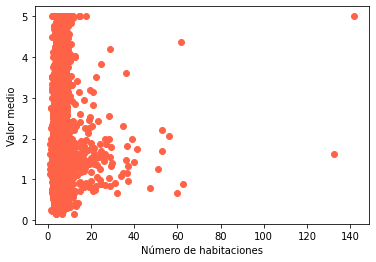

In [ ]:
#Graficamos los datos correspondientes
# plt.scatter(X, y)
plt.scatter(A, b, color='tomato')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Defino el algoritmo a utilizar
lr = linear_model.LinearRegression()

In [ ]:
#Entreno el modelo
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Realizo una predicción
Y_pred = lr.predict(X_test)

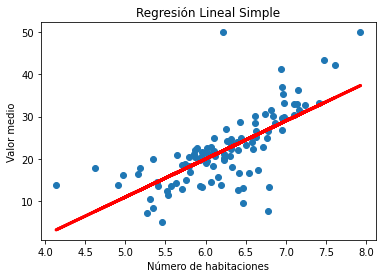

In [ ]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = ', lr.coef_, 'x ', lr.intercept_)
predict = lr.intercept_ + lr.coef_ * 6
print(predict)

DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[9.03470608]
Valor de la intersección o coeficiente "b":
-34.28789590712773

La ecuación del modelo es igual a:
y =  [9.03470608] x  -34.28789590712773
[19.92034055]


In [ ]:
print('Precisión del modelo:')
print(lr.score(X_train, y_train))

Precisión del modelo:
0.4784879141417404


Variables

In [ ]:
import tensorflow as tf
habitaciones = np.array(boston.data[:, np.newaxis, 5],dtype =float)
valor = np.array(boston.target,dtype=float)

capas y modelo

In [ ]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

In [ ]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss='mean_squared_error')

entrenamiento

In [ ]:
print("Comenzando entrenamiento ...")
historial = modelo.fit(habitaciones, valor, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento ...
Modelo entrenado!


grafico del entrenamiento

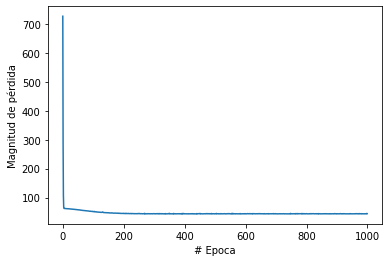

In [ ]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

Prediccion red neuronal

In [ ]:
print("Hagamos una predicción!")
resultado = modelo.predict([6])
print("si se tienen 6 habitaciones el precio ronda los:" + str(resultado),"mil dolares")

Hagamos una predicción!
si se tienen 6 habitaciones el precio ronda los:[[21.038448]] mil dolares


variables internas red neuronal

In [ ]:
print("Variables internas del modelo")
print(capa.get_weights())

Variables internas del modelo
[array([[9.266307]], dtype=float32), array([-34.55939], dtype=float32)]


comparacion predicciones

In [ ]:
print("la prediccion de la regresion lineal es de:",predict)
print("la prediccion de la red neuronal es de:",resultado)

la prediccion de la regresion lineal es de: [19.92034055]
la prediccion de la red neuronal es de: [[21.038448]]


In [ ]:
# en conclusion el modelo se hacerco vastante a los resultados esperados teniendo un error de poco mas de 1 digito